# Q1. Explain GET and POST methods.

GET and POST Methods
---------------------
In web development, **GET** and **POST** are two of the most commonly used HTTP methods for sending and receiving data between the client and server. Both methods are used to interact with web resources but differ in how data is transmitted and how secure the communication is.

### GET Method:
---------------
1. **Purpose**:
   - The GET method is used to **retrieve** data from the server. It is the most commonly used HTTP method for requesting data from a web server.
   - It is used to fetch information like web pages, images, and other resources.

2. **Data Transmission**:
   - In a GET request, the data is sent **appended to the URL** in the form of a query string. This query string is visible in the browser's address bar.
   - Example:
     ```
     GET /search?query=flask HTTP/1.1
     ```
     Here, `query=flask` is the data being sent to the server.

3. **Limitations**:
   - Since the data is sent in the URL, it is **visible** and has **size limitations** (around 2048 characters depending on the browser).
   - GET is **not secure** for transmitting sensitive data (like passwords or credit card information) because the data is exposed in the URL.

4. **Use Case**:
   - GET requests are primarily used to fetch resources without modifying any server-side data.
   - Examples: Fetching a web page, retrieving search results, or viewing a user's profile.

5. **Idempotency**:
   - GET requests are **idempotent**, meaning that calling the same GET request multiple times will not have side effects on the data. It only fetches the data.

6. **Cacheable**:
   - Responses to GET requests can be cached, which allows faster access to frequently accessed data.

### POST Method:
----------------
1. **Purpose**:
   - The POST method is used to **send data to the server** to create or update a resource. It is commonly used for submitting form data, uploading files, and interacting with databases.

2. **Data Transmission**:
   - In a POST request, the data is sent **in the body of the request**, rather than being appended to the URL. This allows sending much larger amounts of data, including sensitive information, as the data is not visible in the URL.
   - Example:
     ```
     POST /submit_form HTTP/1.1
     Content-Type: application/x-www-form-urlencoded
     name=JohnDoe&email=johndoe@example.com
     ```

3. **Limitations**:
   - POST does not have the same data size limitation as GET because the data is included in the body of the request.
   - While the data is not visible in the URL, it is not automatically encrypted unless the request is made over HTTPS.

4. **Use Case**:
   - POST requests are used when submitting form data, logging in, creating new resources, or modifying server-side data.
   - Examples: Submitting a contact form, posting a comment on a blog, logging into a website, uploading files.

5. **Non-idempotency**:
   - POST requests are **non-idempotent**, meaning that submitting the same request multiple times could result in different outcomes (such as creating duplicate records in a database).

6. **Not Cacheable**:
   - Responses to POST requests are **not cached** by default, as POST is often used for operations that modify data.

### Comparison Table:

| Feature                | GET                                   | POST                                 |
|------------------------|---------------------------------------|--------------------------------------|
| **Purpose**            | Retrieve data                        | Send data to create/update resources |
| **Data in URL**        | Yes, appended to URL                 | No, sent in request body             |
| **Visibility of Data** | Data is visible in the URL           | Data is not visible                  |
| **Data Size**          | Limited (around 2048 characters)     | No fixed size limit                  |
| **Security**           | Not secure for sensitive data        | More secure for sensitive data       |
| **Idempotency**        | Idempotent                           | Non-idempotent                       |
| **Cacheable**          | Can be cached                        | Not cached                           |
| **Use Case**           | Fetching data (e.g., search, get page)| Sending data (e.g., form submission, login) |


# Q2. Why is request used in Flask?

# In Flask, the `request` object is a crucial part of handling HTTP requests. It provides access to various details about the incoming request made by the client (such as form data, query parameters, files, and more).
# This object allows you to interact with the data sent by the client and to handle it effectively within the Flask application.

### Key Functions of the `request` Object:
# ----------------------------------------

1. **Accessing Data Sent with HTTP Methods**:
   - The `request` object helps retrieve data sent from the client in **GET**, **POST**, and other HTTP requests.
   - For example, when a user submits a form or sends data to the server, the `request` object can be used to access that data.

2. **Form Data**:
   - In a **POST** request, data is often submitted in the form of key-value pairs. You can access this data via `request.form`.
   - Example:
     ```python
     from flask import request

     @app.route('/submit', methods=['POST'])
     def submit_form():
         name = request.form['name']
         email = request.form['email']
         return f"Name: {name}, Email: {email}"
     ```
     In this case, the `request.form` object retrieves form data sent in the POST request.

3. **Query Parameters**:
   - In a **GET** request, data is usually passed through the URL as query parameters. You can access them with `request.args`.
   - Example:
     ```python
     @app.route('/search')
     def search():
         query = request.args.get('query')  # Retrieving the 'query' parameter from the URL
         return f"Search Query: {query}"
     ```
     For a URL like `/search?query=flask`, the `request.args.get('query')` will return the value `'flask'`.

4. **JSON Data**:
   - When the client sends data in **JSON** format (often in API requests), the `request.json` or `request.get_json()` method can be used to parse it.
   - Example:
     ```python
     @app.route('/api', methods=['POST'])
     def api_request():
         data = request.get_json()  # Extracting JSON data from the request body
         return f"Received data: {data}"
     ```

5. **File Uploads**:
   - The `request.files` attribute is used to handle file uploads. When users upload files through forms, `request.files` contains the files submitted.
   - Example:
     ```python
     @app.route('/upload', methods=['POST'])
     def upload_file():
         file = request.files['file']  # Retrieving the uploaded file
         file.save(f"./uploads/{file.filename}")
         return "File uploaded successfully!"
     ```

6. **Headers and Cookies**:
   - The `request.headers` provides access to HTTP headers, which can include metadata like the user-agent or authorization tokens.
   - The `request.cookies` attribute allows you to access cookies sent by the client.
   - Example:
     ```python
     @app.route('/headers')
     def show_headers():
         user_agent = request.headers.get('User-Agent')
         return f"Your User-Agent is: {user_agent}"
     ```

7. **Request Method**:
   - The `request.method` attribute returns the HTTP method used in the request (e.g., GET, POST, etc.).
   - Example:
     ```python
     @app.route('/method', methods=['GET', 'POST'])
     def show_method():
         return f"Request Method: {request.method}"
     ```

### Why is the `request` Object Important in Flask?
# ---------------------------------------------------
1. **Dynamic Interaction with Client**:
   - The `request` object allows Flask to dynamically handle incoming requests from the client. It enables the application to read data (such as form data, URL parameters, files) and respond accordingly.
   
2. **Web Application Flexibility**:
   - It supports various methods of data exchange between the client and server, such as form submissions, query parameters, JSON requests, and file uploads. This flexibility allows Flask to be used for different types of web applications, from simple websites to complex APIs.

3. **Handling Different HTTP Methods**:
   - The `request` object allows Flask to handle different types of HTTP methods (GET, POST, PUT, DELETE), which are common in web applications. This allows Flask to perform different operations based on the HTTP method used by the client.

4. **Secure Data Handling**:
   - Flask’s `request` object makes it easier to access user-submitted data securely (e.g., avoiding SQL injection) by providing methods to handle input in a structured and safe way.

5. **Request Context**:
   - Flask uses a concept called "request context" to manage the lifecycle of each request. The `request` object is automatically populated with information about the current request and is available throughout the processing of that request.


# Q3. Why is redirect() used in Flask?

# In Flask, the `redirect()` function is used to send the client to a different URL. It is a part of Flask's response handling system, allowing the server to instruct the browser to navigate to a different route.
# This is commonly used after a form submission or when a user needs to be redirected to another page for various reasons such as login, registration, or after performing certain actions (like deleting a record).

### Key Points about `redirect()`:
# --------------------------------

1. **HTTP Redirection**:
   - The `redirect()` function generates an HTTP 302 status code, which tells the browser to make a new request to the specified location (URL). This process is called an HTTP redirect.
   - It essentially tells the browser, "Go to this new URL."
   
2. **Common Use Case**:
   - After a successful form submission, you may want to redirect the user to another page to show a success message, avoid resubmission (using Post/Redirect/Get pattern), or take them to a different view.
   
3. **Redirect to Another URL**:
   - You can specify the URL to redirect to directly, or you can use Flask's `url_for()` function to dynamically generate a URL for a specific endpoint.
   - Example with static URL:
     ```python
     from flask import redirect

     @app.route('/submit', methods=['POST'])
     def submit():
         # After handling form submission, redirect to another page
         return redirect('/thank_you')
     ```

   - Example with `url_for()` for dynamic URL generation:
     ```python
     from flask import redirect, url_for

     @app.route('/submit', methods=['POST'])
     def submit():
         # Redirecting to another route dynamically using `url_for`
         return redirect(url_for('thank_you'))
     ```

4. **Post/Redirect/Get Pattern**:
   - A common use of `redirect()` is to implement the **Post/Redirect/Get** pattern, where after a POST request (such as form submission), the user is redirected to a new URL using a GET request. This prevents the form from being resubmitted if the user refreshes the page.

5. **Redirect with HTTP Codes**:
   - Flask’s `redirect()` function by default uses HTTP status code 302 (Found), but you can also specify other redirection codes, like 301 (Moved Permanently) or 303 (See Other), depending on the use case.
   - Example:
     ```python
     return redirect('/new_page', code=301)  # Permanent redirection (301)
     ```

6. **Handling Redirection with Parameters**:
   - You can also pass query parameters along with the redirection URL by modifying the URL directly or using the `url_for()` function.
   - Example with query parameters:
     ```python
     return redirect(url_for('show_profile', user_id=123))  # Passing a parameter to the new page
     ```

7. **Redirect to External URLs**:
   - Flask also supports redirection to external URLs (e.g., external websites, APIs).
   - Example:
     ```python
     return redirect('https://www.example.com')
     ```

### Why is `redirect()` Important in Flask?
# -------------------------------------------------
1. **Managing User Navigation**:
   - The `redirect()` function is useful for controlling how users navigate through the application, especially after certain actions like form submissions, login, or logout.
   
2. **Implementing Workflow Logic**:
   - It helps in guiding users through the correct flow, whether by showing a confirmation page, redirecting to a success or error page, or ensuring that the user is directed to a new page after completing an action.

3. **Preventing Duplicate Submissions**:
   - It’s especially helpful in preventing users from accidentally resubmitting forms or triggering the same action again by refreshing the page after a POST request.

4. **Routing Flexibility**:
   - The ability to dynamically generate URLs using `url_for()` adds flexibility in redirecting users to different parts of the application, regardless of URL changes or route modifications.

### Example of Redirect in Flask:
# --------------------------------
```python
from flask import Flask, redirect, url_for

app = Flask(__name__)

@app.route('/')
def home():
    return 'Welcome to the homepage!'

@app.route('/login')
def login():
    # Redirecting to the dashboard after login
    return redirect(url_for('dashboard'))

@app.route('/dashboard')
def dashboard():
    return 'Welcome to the dashboard!'

if __name__ == "__main__":
    app.run(debug=True)

# Q4. What are templates in Flask? Why is the render_template() function used?

# Templates in Flask are HTML files that are used to display dynamic content on the web pages.
# Flask uses the Jinja2 templating engine to enable the inclusion of dynamic content in static HTML files.
# With templates, you can inject variables, control structures, and loops into the HTML, making it more flexible and dynamic.

### Key Points about Templates in Flask:
# --------------------------------------
1. **Separation of Concerns**:
   - Templates help separate the logic of the application from its presentation. This allows for better organization and maintainability of code.
   - The application logic (defined in Python) is kept separate from the HTML content (stored in templates).

2. **Jinja2 Templating Engine**:
   - Flask uses Jinja2 as its templating engine. Jinja2 is a modern and designer-friendly templating system for Python.
   - It allows developers to use placeholders (variables) in HTML, control structures (such as loops and conditions), and filter data easily.
   
3. **HTML and Dynamic Content**:
   - Templates allow you to display dynamic content based on variables passed from the Flask application. This means the content can change according to user interactions or data fetched from a database.

4. **Template Files Location**:
   - By default, Flask looks for templates inside the `templates` directory, which is located at the root level of the Flask application. For example, the file structure might look like:
     ```
     /myapp
        /templates
            - index.html
            - about.html
        app.py
     ```

### Why is `render_template()` Used in Flask?
# -------------------------------------------------
The `render_template()` function is used in Flask to render (i.e., process and display) a template file with the variables passed from the Flask route. This function combines the template with the data provided and returns a complete HTML response that is sent to the client’s browser.

#### Key Points about `render_template()`:
# ------------------------------------------------

1. **Rendering Templates with Data**:
   - The `render_template()` function takes the name of the template as its first argument and the data (variables) as additional keyword arguments. The variables are then injected into the template for rendering.
   - Example: If you want to pass a user name to a template, you could use `render_template()` like this:
     ```python
     from flask import render_template

     @app.route('/')
     def home():
         user_name = 'John Doe'
         return render_template('index.html', user=user_name)
     ```

2. **Dynamic Content Generation**:
   - It allows for the generation of dynamic web pages. The template (HTML file) can include placeholders, loops, and conditional logic that are filled in with values during rendering.
   - Example:
     ```html
     <!-- index.html -->
     <html>
     <body>
         <h1>Welcome, {{ user }}!</h1>
     </body>
     </html>
     ```
     When this template is rendered, `{{ user }}` will be replaced with the value passed from the route (in this case, "John Doe").

3. **Reusability**:
   - Templates allow for reusability. Common structures (like headers, footers, or navigation bars) can be defined once and included in multiple templates using Jinja2’s `{% include %}` directive.

4. **Inheritance**:
   - Flask templates support inheritance. A base template can be defined (with common structure like header, footer, etc.), and other templates can extend this base template. This allows for a DRY (Don’t Repeat Yourself) approach to web page design.

5. **Rendering with Loops and Conditions**:
   - Templates support control structures like loops and conditions to dynamically generate content based on data. For example, you can loop through a list of users and display each one:
     ```html
     <!-- users.html -->
     <ul>
         {% for user in users %}
             <li>{{ user.name }}</li>
         {% endfor %}
     </ul>
     ```

6. **Flask Template Filters**:
   - Flask provides various built-in filters that can be used in templates to modify data before displaying it. For instance, you can format dates, uppercase text, or apply custom transformations.
     ```html
     <p>{{ user.joined_at | date("F j, Y") }}</p>  <!-- Formatting a date -->
     ```

### Example of Using `render_template()`:
# ---------------------------------------
```python
from flask import Flask, render_template

app = Flask(__name__)

@app.route('/')
def home():
    user_name = 'John Doe'
    return render_template('index.html', user=user_name)

if __name__ == "__main__":
    app.run(debug=True)

# Q5. Create a simple API. Use Postman to test it. Attach the screenshot of the output in the Jupyter Notebook.

In [ ]:
from flask import Flask,request ,render_template , jsonify

app = Flask(__name__)


@app.route('/')
def home_page():
    return render_template('index.html')


@app.route('/math',methods=['POST'])
def math_ops():
    if(request.method == 'POST'):
        ops = request.form['operation']
        num1 = int(request.form['num1'])
        num2 = int(request.form['num2'])
        if ops == 'add':
            r = num1+num2
            result = "The sum of " + str(num1) + 'and ' + str(num2) + "is " + str(r)
        if ops == 'subtract':
            r = num1-num2
            result = "The subtract of " + str(num1) + 'and ' + str(num2) + "is " + str(r)
        if ops == 'multiply':
            r = num1*num2
            result = "The multiply of " + str(num1) + 'and ' + str(num2) + "is " + str(r)
        if ops == 'divide':
            r = num1/num2
            result = "The divide of " + str(num1) + 'and ' + str(num2) + "is " + str(r)

        return render_template('results.html' , result = result)




@app.route('/postman_action',methods=['POST'])
def math_ops1():
    if(request.method == 'POST'):
        ops = request.json['operation']
        num1 = int(request.json['num1'])
        num2 = int(request.json['num2'])
        if ops == 'add':
            r = num1+num2
            result = "The sum of " + str(num1) + 'and ' + str(num2) + "is " + str(r)
        if ops == 'subtract':
            r = num1-num2
            result = "The subtract of " + str(num1) + 'and ' + str(num2) + "is " + str(r)
        if ops == 'multiply':
            r = num1*num2
            result = "The multiply of " + str(num1) + 'and ' + str(num2) + "is " + str(r)
        if ops == 'divide':
            r = num1/num2
            result = "The divide of " + str(num1) + 'and ' + str(num2) + "is " + str(r)

        return jsonify(result)

if __name__=="__main__":
    app.run(host="0.0.0.0"

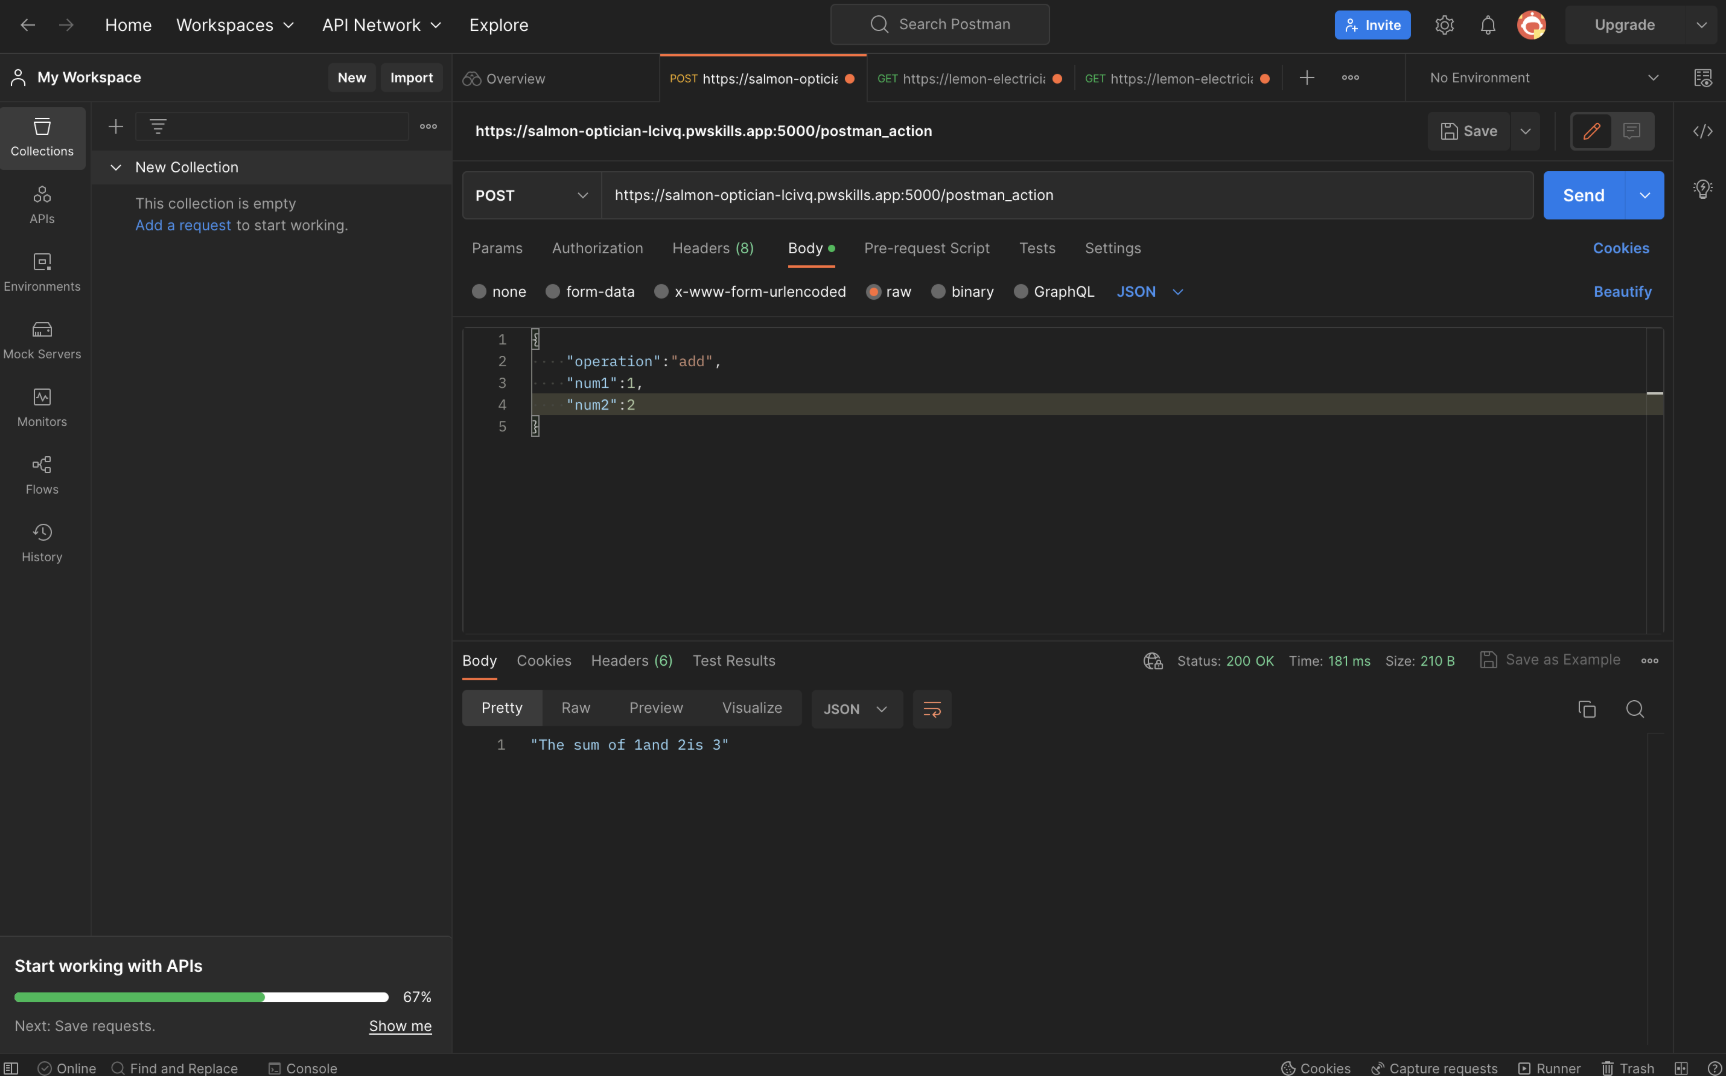